In [25]:
from peewee import *
from datetime import date
import pandas as pd
import re
from ast import literal_eval
import seaborn as sns
from matplotlib import pyplot as plt

DB_NAME = 'HorsingAround'
USER = 'maartjehuveneers'
PASSWORD = 'p4RwxJCchw7Ljqhv'
HOST = 'www.jacobkamminga.nl'
PORT = 3306


# Establish connection to database
def connect(db_name, username, password, host, port):
    db = MySQLDatabase(db_name, user=username, password=password, host=host, port=port)
    db.connect()
    print("Connected to: " + host + ":" + str(port))
    return db


def save_experiment(Experiment, uid, horse, acc, balanced_acc, f_score_avg, mcc_score, recall, matrix, params, desc):
    Experiment.create(key=uid,
                      username=USER,
                      test_horse=horse,
                      date=date.today(),
                      accuracy_experiment=acc,
                      balanced_accuracy_experiment=balanced_acc,
                      fscore=f_score_avg,
                      mcc=mcc_score,
                      recall=recall,
                      confusion_matrix=matrix,
                      parameters=params,
                      description=desc)

def save_activity(Activity, uid, horse, activity, matrix, index, recall, precision):
    TP = matrix[index][index]
    FN = matrix[index].sum() - TP
    FP = 0
    for j in range(0, len(matrix)):
        FP += matrix[j][index]
    FP = FP - TP
    TN = matrix.sum() - TP - FN - FP

    specificity = TN/(TN+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    #save results per activity per horse in the database
    Activity.create(key=uid, 
                    test_horse=horse, 
                    activity=activity, 
                    accuracy_activity=accuracy, 
                    recall_activity=recall, 
                    specificity=specificity, 
                    precision=precision, 
                    TP=TP, 
                    TN=TN,
                    FP=FP,
                    FN=FN)

def get_classes(db):
    class Experiment(Model):
        key = UUIDField()
        username = TextField()
        test_horse = TextField()
        date = DateField()
        accuracy_experiment = FloatField()
        balanced_accuracy_experiment = FloatField()
        fscore = FloatField()
        mcc = FloatField()
        recall = FloatField()
        confusion_matrix = BlobField()
        parameters = TextField()
        description = TextField()

        class Meta:
            database = db


    class Activity(Model):
        key = UUIDField()
        test_horse = TextField()
        activity = TextField()
        accuracy_activity = FloatField()
        recall_activity = FloatField()
        specificity = FloatField()
        precision = FloatField()
        TP = IntegerField()
        TN = IntegerField()
        FP = IntegerField()
        FN = IntegerField()

        class Meta:
            database = db
            
    return Experiment, Activity

In [18]:
def show_results(key, username, test_horse, day, month, activity):
    database = connect(DB_NAME, USER, PASSWORD, HOST, PORT)
    Experiment, Activity = get_classes(database)

    exp_query = Experiment.select().dicts()
    act_query = Activity.select().dicts()
    if(key != None):
        exp_query = exp_query.select().where(Experiment.key == key)
        act_query = act_query.select().where(Activity.key == key)
    if(username != None):
        exp_query = exp_query.select().where(Experiment.username == username)
    if(test_horse != None):
        exp_query = exp_query.select().where(Experiment.test_horse == test_horse)
        act_query = act_query.select().where(Activity.test_horse == test_horse)
    if(day != None):
        exp_query = exp_query.select().where(Experiment.date.day == day)
    if(month != None):
        exp_query = exp_query.select().where(Experiment.date.month == month)
    if(activity != None):
        act_query = act_query.select().where(Activity.activity == activity)
    pd.options.display.float_format = '{:,.5f}'.format
    exp_querydf = pd.DataFrame.from_dict(exp_query)
    display(exp_querydf)
    act_querydf = pd.DataFrame.from_dict(act_query)
    display(act_querydf)
    
#input the selections here. For example, replace username=None with username="maartjehuveneers" to select on Maartje's results
show_results(key=None, 
             username=None, 
             test_horse=None, 
             day=None,
             month=None,
             activity=None)

Connected to: www.jacobkamminga.nl:3306


,id,key,username,test_horse,date,accuracy_experiment,balanced_accuracy_experiment,fscore,mcc,recall,confusion_matrix,parameters,description
0,1,89c4f095-84f4-446a-9db9-4406fbb81ca9,suzannespink,Galoway,2021-05-17,0.73122,0.00000,0.70390,0.64406,0.73122,b'[[ 0 0 0 0 0 0 0 ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
1,2,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,maartjehuveneers,Galoway,2021-05-17,0.80462,0.61325,0.77483,0.73547,0.80462,b'[[ 4012 0 857 0 78 28]\n [ ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
2,3,89c4f095-84f4-446a-9db9-4406fbb81ca9,suzannespink,Patron,2021-05-17,0.85480,0.00000,0.81522,0.80256,0.85480,b'[[1746 0 0 0 0 0 86 0 ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
3,4,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,maartjehuveneers,Patron,2021-05-17,0.90702,0.58222,0.88140,0.82867,0.90702,b'[[ 0 0 0 0 0 0]\n [ 0 ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
4,5,89c4f095-84f4-446a-9db9-4406fbb81ca9,suzannespink,Happy,2021-05-17,0.89129,0.00000,0.88627,0.85110,0.89129,b'[[ 0 2 0 0 0 0 0 0 ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
5,6,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,maartjehuveneers,Happy,2021-05-17,0.88825,0.60766,0.86307,0.84411,0.88825,b'[[5835 0 4 0 13 5]\n [ 0 ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
6,7,89c4f095-84f4-446a-9db9-4406fbb81ca9,suzannespink,Driekus,2021-05-17,0.65024,0.00000,0.69070,0.62118,0.65024,b'[[ 0 0 32 0 0 0 0 0 ...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
7,8,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,maartjehuveneers,Driekus,2021-05-17,0.80543,0.59315,0.80768,0.72839,0.80543,b'[[2872 0 0 0 0 1]\n [ 0 1...,"TIME_PERIOD: 200, STEP_DISTANCE: 100, BATCH_SI...","Neural Network with 6 layers (Reshape, Dense x..."
8,9,c181c237-2b89-4095-8159-7c6bca1a181c,,Galoway,0000-00-00,0.00000,0.00000,0.00000,0.00000,0.00000,b'',,
9,10,c181c237-2b89-4095-8159-7c6bca1a181c,,Galoway,0000-00-00,0.00000,0.00000,0.00000,0.00000,0.00000,b'',,


,id,key,test_horse,activity,accuracy_activity,recall_activity,specificity,precision,TP,TN,FP,FN
0,1,89c4f095-84f4-446a-9db9-4406fbb81ca9,Galoway,standing,0.99937,0.00000,1.00000,0.00000,0,28507,0,18
1,2,89c4f095-84f4-446a-9db9-4406fbb81ca9,Galoway,walking-natural,0.99888,0.00000,1.00000,0.00000,0,28493,0,32
2,3,89c4f095-84f4-446a-9db9-4406fbb81ca9,Galoway,walking-rider,0.96046,0.00000,0.98751,0.93396,4158,23239,294,834
3,4,89c4f095-84f4-446a-9db9-4406fbb81ca9,Galoway,trotting-natural,0.99499,0.00000,0.99982,0.00000,0,28382,5,138
4,5,89c4f095-84f4-446a-9db9-4406fbb81ca9,Galoway,trotting-rider,0.98538,0.00000,0.98586,0.00248,1,28107,403,14
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,Driekus,trotting,0.99311,0.80741,0.99982,0.99392,327,11203,2,78
73,74,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,Driekus,standing,0.90853,0.74694,0.96551,0.88424,2261,8287,296,766
74,75,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,Driekus,walking-natural,0.91085,0.13313,0.93311,0.05388,43,10532,755,280
75,76,f6fe1f8d-52e3-4015-af8f-c64e62f73ccb,Driekus,walking-rider,0.85280,0.83145,0.86686,0.80441,3833,6068,932,777


Connected to: www.jacobkamminga.nl:3306


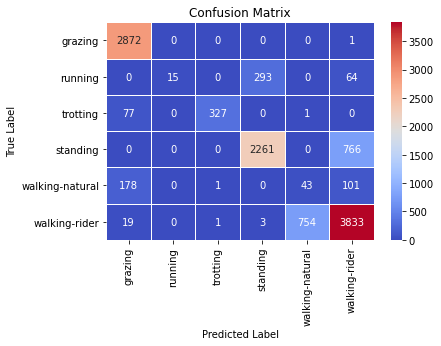

In [27]:
import ipynb.fs.full.preprocessing as preprocessing

def show_confusion_matrix_from_db(experiment_key):
    database = connect(DB_NAME, USER, PASSWORD, HOST, PORT)
    Experiment, Activity = get_classes(database)
    
    query = Experiment.select().where(Experiment.key == experiment_key).dicts()
    conf_matrix = []
    for q in query:
        conf_matrix = q
    
    if(len(conf_matrix)!=0):
        m = conf_matrix.get('confusion_matrix')
        m = m.decode()
        m = m.replace("{'confusion_matrix': ", "")
        m = m.replace("}", "")
        m = re.sub("\s+", ",", m.strip())
        m = m.replace("[,", "[")
        m = literal_eval(m)
        plt.figure(figsize=(6, 4))
        sns.heatmap(m,
                    cmap='coolwarm',
                    linecolor='white',
                    linewidths=1,
                    xticklabels=preprocessing.LABELS,
                    yticklabels=preprocessing.LABELS,
                    annot=True,
                    fmt='d')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

show_confusion_matrix_from_db("f6fe1f8d-52e3-4015-af8f-c64e62f73ccb")